In [1]:
import pandas as pd
import numpy as np
import os
path_in = os.path.join("../Data")  # parent directory
np.random.seed(42)

import sys
sys.path.append(os.path.abspath(".."))  

from FinalToolModels.models import *
from FinalToolModels.simulate import *
from FinalToolModels.plot import *
from FinalToolModels.train import *
from FinalToolModels.split_dataset import *

%load_ext autoreload
%autoreload 2

# === Paths ===
###################### ======================== Case Study 1 ======================= ###########################

file_path = os.path.join(path_in, "dataset2.xlsx")
cs1 = pd.read_excel(file_path)

cs1["INDOOR_TEMP"] = cs1[["RTD31", "RTD34", "RTD37", "RTD40", "RTD41"]].mean(axis=1)
# Rename columns
rename_mapping = {
        'Tout': 'OUTDOOR_TEMP',
        'PhRad_actual_power': 'PHI_H',
        'SolGlob': 'PYRANOMETER'
    }
cs1 = cs1.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs1['Time'] = pd.to_datetime(cs1['Time'])
cs1 = cs1.set_index('Time')
cs1_surface_area = 100  # m² 
cs1 = cs1.iloc[0:960]

train_cs1, val_cs1, test_cs1 = split_dataset(cs1, testing_days=3, val_split=0.3)

###################### ======================== Case Study 2 ======================= ###########################

file_path = os.path.join(path_in, "dataset4.xlsx")
cs2 = pd.read_excel(file_path)
# Rename columns
rename_mapping = {
        'T_ext': 'OUTDOOR_TEMP',
        'heating_total [kW]': 'PHI_H',
        'GHI': 'PYRANOMETER',
        'T_int': 'INDOOR_TEMP'
    }
cs2 = cs2.rename(columns=rename_mapping)
cs2['PHI_H']=cs2['PHI_H']*1000
# Convert 't' to datetime and set as index

cs2['Time'] = pd.to_datetime(cs2['Time'])
cs2 = cs2.set_index('Time')
cs2 = cs2.resample("30min").mean()
cs2_surface_area = 2100  # m² 
cs2 = cs2.iloc[0:960]

train_cs2, val_cs2, test_cs2 = split_dataset(cs2, testing_days=3, val_split=0.3)

###################### ======================== Case Study 3 ======================= ###########################

file_path = os.path.join(path_in, "dataset5-cella.xlsx")
cs3 = pd.read_excel(file_path)
cs3["INDOOR_TEMP"] = cs3[["ra_zone_air_temp1_C", "ra_zone_air_temp2_C"]].mean(axis=1)
cs3['PHI_H']=cs3['ra_sup_air_flow_cmh']/3600*1.2*(cs3['ra_sup_air_temp_C']-cs3['INDOOR_TEMP'])*1005
# Rename columns
rename_mapping = {
        'oat_C': 'OUTDOOR_TEMP',
        'global_irradiance_Wm2': 'PYRANOMETER',
    }
cs3 = cs3.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs3['time'] = pd.to_datetime(cs3['time'])
cs3 = cs3.set_index('time')
cs3 = cs3.resample("30min").mean()
cs3=cs3[cs3.index>'2020-07-21']
cs3_surface_area = 57  # m² 
cs3= cs3.iloc[0:960]

train_cs3, val_cs3, test_cs3 = split_dataset(cs3, testing_days=3, val_split=0.3)

###################### ======================== Case Study 4 ======================= ###########################

file_path = os.path.join(path_in, "dataset5-cellb.xlsx")
cs4 = pd.read_excel(file_path)
cs4["INDOOR_TEMP"] = cs4[["rb_zone_air_temp1_C", "rb_zone_air_temp2_C"]].mean(axis=1)
cs4['PHI_H']=cs4['rb_sup_air_flow_cmh']/3600*1.2*(cs4['rb_sup_air_temp_C']-cs4['INDOOR_TEMP'])*1005
# Rename columns
rename_mapping = {
        'oat_C': 'OUTDOOR_TEMP',
        'global_irradiance_Wm2': 'PYRANOMETER',
    }
cs4 = cs4.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs4['time'] = pd.to_datetime(cs4['time'])
cs4 = cs4.set_index('time')
cs4 = cs4.resample("30min").mean()
cs4=cs4[cs4.index>'2020-07-21']
cs4_surface_area = 57  # m² 
cs4= cs4.iloc[0:960]

train_cs4, val_cs4, test_cs4 = split_dataset(cs4, testing_days=3, val_split=0.3)

## 1R1C


=== Best result ===
Best Trial Validation #: 13
Best Trial Training #: 0
Best RMSE Validation: 0.2818
RMSE Training of Best Validation : 0.0226
Best RMSE Training: 0.0226
Best initialization Validation: {'R_in_a': 0.4407123412458617, 'C_in': 61897079.18754464, 'Ain': 14.855812126427994}
Best initialization Training: {'R_in_a': 0.37516557872851514, 'C_in': 475406438.8985482, 'Ain': 21.96008626040034}
Best parameters Validation: {'R_in_a': 0.013474304905878571, 'C_in': 23043303.488275442, 'Ain': 3.472482194814199, 'fh': 1, 'Objective': 0.022632530669965477, 'Solve_time': 0.03246307373046875}
Best parameters Training: {'R_in_a': 0.013474304904944931, 'C_in': 23043303.48793064, 'Ain': 3.472482198407022, 'fh': 1, 'Objective': 0.022632530669962278, 'Solve_time': 0.0386049747467041}
Solve Time: 0.8467161655426025


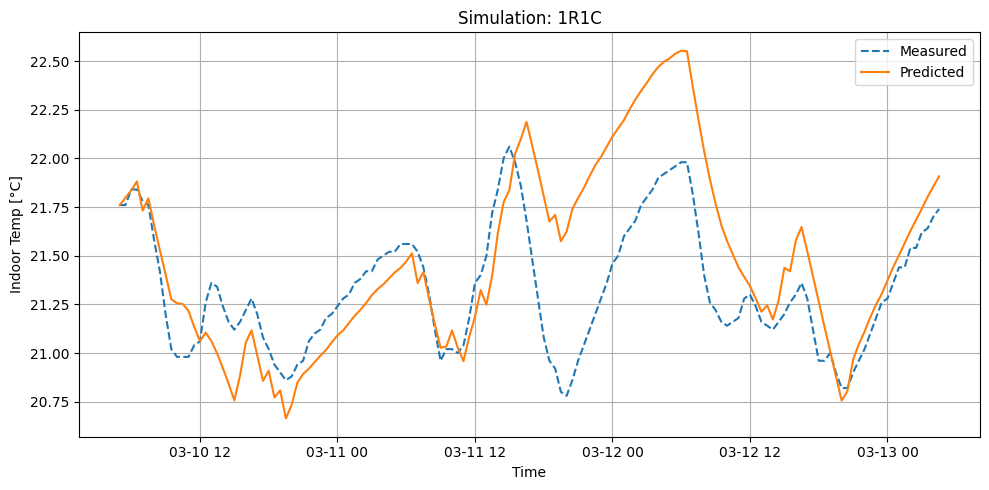


=== Best result ===
Best Trial Validation #: 1
Best Trial Training #: 0
Best RMSE Validation: 1.3382
RMSE Training of Best Validation : 0.7585
Best RMSE Training: 0.7585
Best initialization Validation: {'R_in_a': 0.3568176513609199, 'C_in': 2810064162.36412, 'Ain': 341.8989896936134}
Best initialization Training: {'R_in_a': 0.38873842196051306, 'C_in': 2714218968.7071853, 'Ain': 522.1048020282063}
Best parameters Validation: {'R_in_a': 0.0004278483857984518, 'C_in': 2477035460.2911386, 'Ain': 630.0000019495444, 'fh': 1, 'Objective': 0.7585099308237321, 'Solve_time': 0.029675960540771484}
Best parameters Training: {'R_in_a': 0.00042784838579845155, 'C_in': 2477035460.291135, 'Ain': 630.0000019495444, 'fh': 1, 'Objective': 0.7585099308237259, 'Solve_time': 0.030879974365234375}
Solve Time: 0.7007226943969727


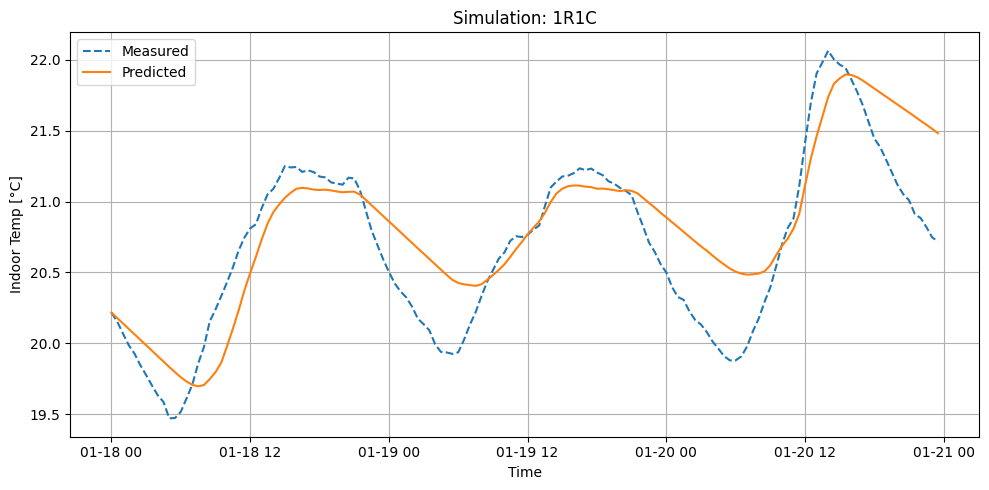


=== Best result ===
Best Trial Validation #: 19
Best Trial Training #: 10
Best RMSE Validation: 1.0638
RMSE Training of Best Validation : 1.3413
Best RMSE Training: 1.3413
Best initialization Validation: {'R_in_a': 0.3873486109542369, 'C_in': 9367300520.067457, 'Ain': 2.352470623952338}
Best initialization Training: {'R_in_a': 0.908357620080687, 'C_in': 2395626511.0508175, 'Ain': 2.478557417887823}
Best parameters Validation: {'R_in_a': 0.011966261202487635, 'C_in': 51157102.83631774, 'Ain': 5.347694870501056, 'fh': 1, 'Objective': 1.3413199988788382, 'Solve_time': 1.169389247894287}
Best parameters Training: {'R_in_a': 0.0119662612021901, 'C_in': 51157102.834537216, 'Ain': 5.347694870549241, 'fh': 1, 'Objective': 1.3413199988587028, 'Solve_time': 0.06504297256469727}
Solve Time: 10.920111656188965


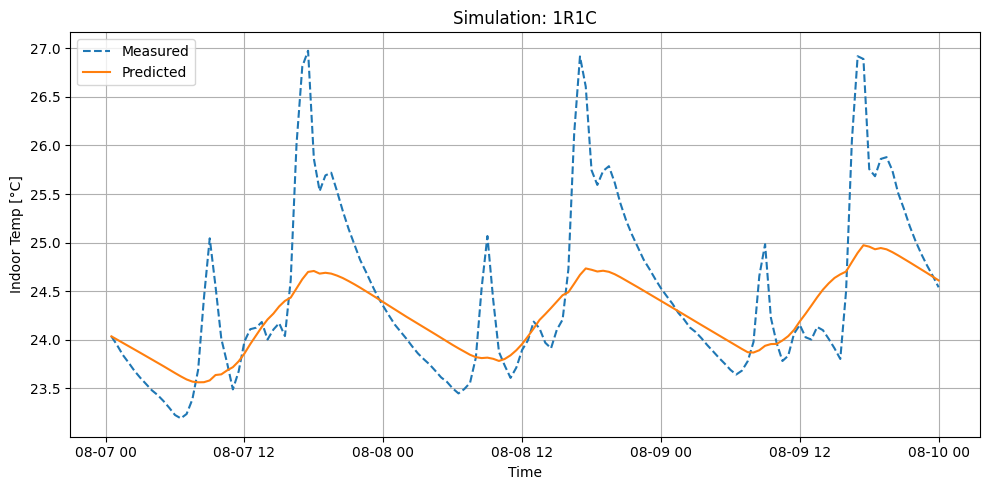


=== Best result ===
Best Trial Validation #: 9
Best Trial Training #: 4
Best RMSE Validation: 1.3387
RMSE Training of Best Validation : 0.6175
Best RMSE Training: 0.3822
Best initialization Validation: {'R_in_a': 0.6638382673389478, 'C_in': 50625787.846348405, 'Ain': 2.7506568711878088}
Best initialization Training: {'R_in_a': 0.9005176391061671, 'C_in': 6331018241.718106, 'Ain': 5.798070397141732}
Best parameters Validation: {'R_in_a': 0.05331762228593394, 'C_in': 33063764.172595732, 'Ain': 3.276113342374217, 'fh': 1, 'Objective': 0.6174637992950974, 'Solve_time': 0.030400753021240234}
Best parameters Training: {'R_in_a': 0.11459281294881239, 'C_in': 13263955.932782806, 'Ain': 2.8022066555335297, 'fh': 1, 'Objective': 0.3822046991256511, 'Solve_time': 1.3107080459594727}
Solve Time: 23.912250995635986


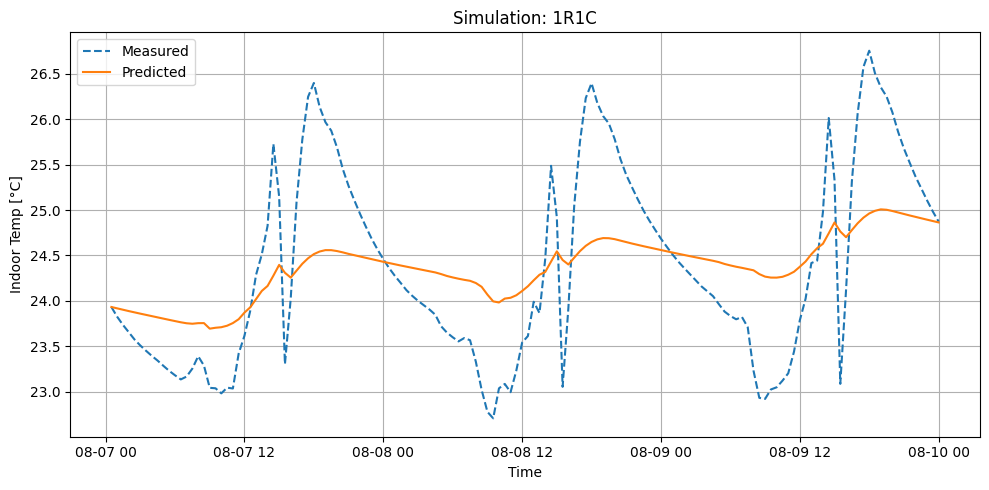

In [2]:
bounds_cs1 = {
        "R_in_a": (0.001, 1),
        "C_in": (1e6, 5e8),
        "Ain": (0.001, 0.3 * cs1_surface_area)
    }
bounds_cs2 = {
        "R_in_a": (0.0001, 1),
        "C_in": (1e6, 1e10),
        "Ain": (0.001, 0.3 * cs2_surface_area)
    }
bounds_cs3 = {
        "R_in_a": (0.001, 1),
        "C_in": (1e4, 1e10),
        "Ain": (0.001, 0.3 * cs3_surface_area)
    }
bounds_cs4 = {
        "R_in_a": (0.001, 1),
        "C_in": (1e4, 1e10),
        "Ain": (0.001, 0.3 * cs4_surface_area)
    }

###################### ======================== Case Study 1 ======================= ###########################

model_1r1c_cs1, parameters_1r1c_cs1, best_initialization_1r1c_cs1, validation_pred_1r1c_cs1, initialize_testing_1r1c_cs1, all_trials_1r1c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="1R1C", bounds=bounds_cs1, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]
# --- Run Simulation for Testing ---
validation, t_pred_1r1c_cs1, t_true_1r1c_cs1, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_1r1c_cs1, model_type="1R1C",
        initializations=initialize_testing_1r1c_cs1, show_plot=True
    )

# ###################### ======================== Case Study 2 ======================= ###########################

model_1r1c_cs2, parameters_1r1c_cs2, best_initialization_1r1c_cs2, validation_pred_1r1c_cs2, initialize_testing_1r1c_cs2, all_trials_1r1c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="1R1C", bounds=bounds_cs2, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_1r1c_cs2, t_true_1r1c_cs2, test_pred = simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_1r1c_cs2, model_type="1R1C", 
        initializations=initialize_testing_1r1c_cs2, show_plot=True
    )

# ###################### ======================== Case Study 3 ======================= ###########################

model_1r1c_cs3, parameters_1r1c_cs3, best_initialization_1r1c_cs3, validation_pred_1r1c_cs3, initialize_testing_1r1c_cs3, all_trials_1r1c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="1R1C", bounds=bounds_cs3, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_1r1c_cs3, t_true_1r1c_cs3, test_pred = simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_1r1c_cs3, model_type="1R1C", 
        initializations=initialize_testing_1r1c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_1r1c_cs4, parameters_1r1c_cs4, best_initialization_1r1c_cs4, validation_pred_1r1c_cs4, initialize_testing_1r1c_cs4, all_trials_1r1c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="1R1C", bounds=bounds_cs4, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_1r1c_cs4, t_true_1r1c_cs4, test_pred = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_1r1c_cs4, model_type="1R1C", 
        initializations=initialize_testing_1r1c_cs4, show_plot=True
    )

# 2R2C


=== Best result ===
Best Trial Validation #: 4
Best Trial Training #: 11
Best RMSE Validation: 0.2249
RMSE Training of Best Validation : 0.0199
Best RMSE Training: 0.0198
Best initialization Validation: {'R_e_a': 0.3601316600685354, 'R_in_e': 0.2942982524202289, 'C_in': 404871216.5837783, 'C_e': 405246583.9449112, 'Ain': 26.012302485084533, 'Ae': 27.397303336141583, 'fh': 0.5113423988609378}
Best initialization Training: {'R_e_a': 0.17412102575077493, 'R_in_e': 0.15728060562841495, 'C_in': 125871206.18413307, 'C_e': 275064105.68835413, 'Ain': 21.43816308507917, 'Ae': 19.806261104155222, 'fh': 0.27993389694594284}
Best parameters Validation: {'R_in_e': 0.047899954475504644, 'R_e_a': 0.0014047712617598126, 'C_in': 6269596.322936051, 'C_e': 1000026.0739862714, 'Ain': 0.39017332360041784, 'Ae': 12.371610910620266, 'fh': 0.2563302119888042, 'Objective': 0.019857898170652206, 'Solve_time': 0.17432212829589844}
Best parameters Training: {'R_in_e': 0.0012273698227369236, 'R_e_a': 0.0126560923

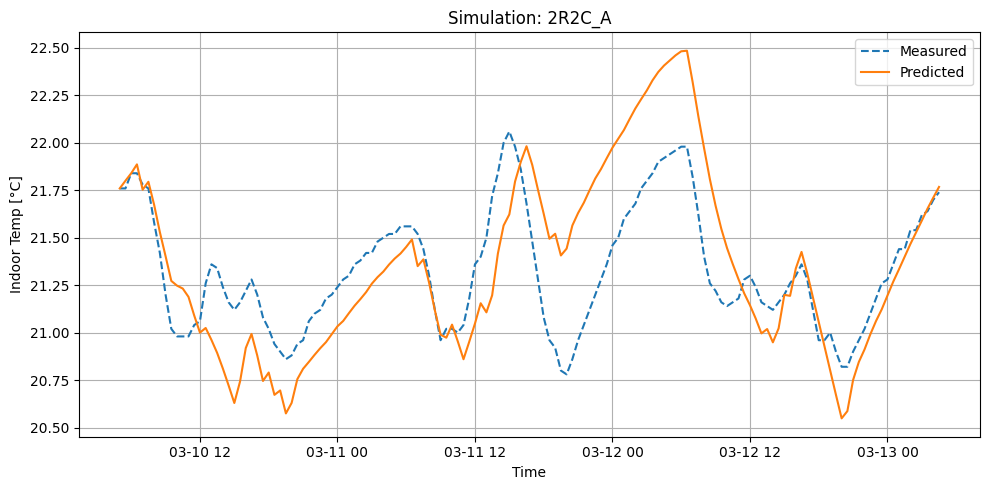


=== Best result ===
Best Trial Validation #: 15
Best Trial Training #: 11
Best RMSE Validation: 1.3723
RMSE Training of Best Validation : 0.7881
Best RMSE Training: 0.6268
Best initialization Validation: {'R_e_a': 0.9012074314857434, 'R_in_e': 0.04592365715128714, 'C_in': 2810350932.732711, 'C_e': 9504164429.281511, 'Ain': 560.8662935874934, 'Ae': 287.06429859824635, 'fh': 0.6201325978015367}
Best initialization Training: {'R_e_a': 0.46892631167312926, 'R_in_e': 0.056775124043996435, 'C_in': 1189060344.764451, 'C_e': 1176144941.5242717, 'Ain': 409.0028411228179, 'Ae': 470.0085278923374, 'fh': 0.5833687650971596}
Best parameters Validation: {'R_in_e': 0.0004999900116009112, 'R_e_a': 0.0004999900005366386, 'C_in': 1262448432.3517206, 'C_e': 38509857.889351286, 'Ain': 226.0489663745912, 'Ae': 0.0010129954853928958, 'fh': -8.939559748433683e-09, 'Objective': 0.7880965463277798, 'Solve_time': 0.7176051139831543}
Best parameters Training: {'R_in_e': 0.9997885674080413, 'R_e_a': 0.9998393908

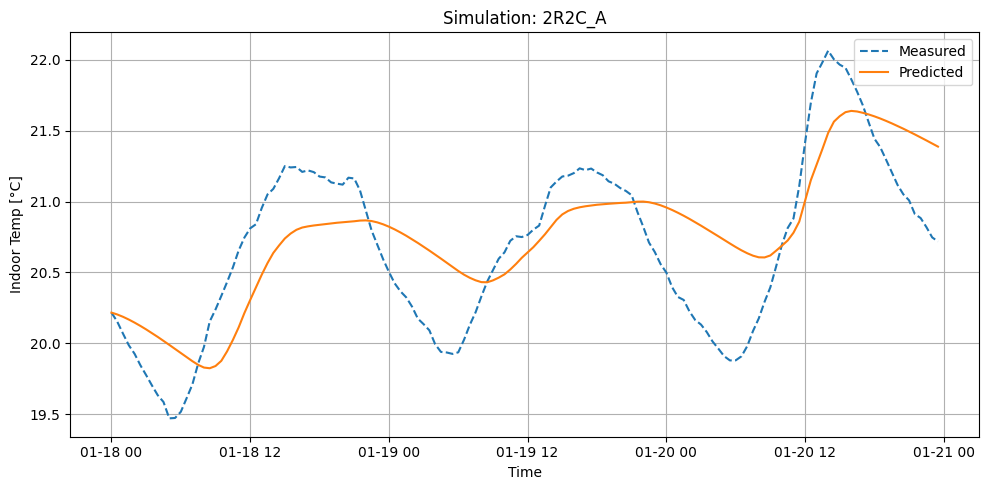


=== Best result ===
Best Trial Validation #: 3
Best Trial Training #: 11
Best RMSE Validation: 0.9191
RMSE Training of Best Validation : 1.2607
Best RMSE Training: 0.5509
Best initialization Validation: {'R_e_a': 0.6065684598164292, 'R_in_e': 0.22941416269795925, 'C_in': 337491838.7808991, 'C_e': 310973479.0266584, 'Ain': 6.125224315643539, 'Ae': 1.9427212690214561, 'fh': 0.6715731955927996}
Best initialization Training: {'R_e_a': 0.1731475513304282, 'R_in_e': 0.19309672978986211, 'C_in': 25229965.051907036, 'C_e': 88622856.22072145, 'Ain': 4.76461620710746, 'Ae': 3.027702270648093, 'fh': 0.08870253375705561}
Best parameters Validation: {'R_in_e': 0.0014524770094855735, 'R_e_a': 0.0009999903962179047, 'C_in': 117774438.25566046, 'C_e': 499993368.98071873, 'Ain': 15.531646228073557, 'Ae': 0.0010064427622207325, 'fh': 0.9999999720392957, 'Objective': 1.2607158572445776, 'Solve_time': 0.25855517387390137}
Best parameters Training: {'R_in_e': 0.002031956102326191, 'R_e_a': 0.0056626753772

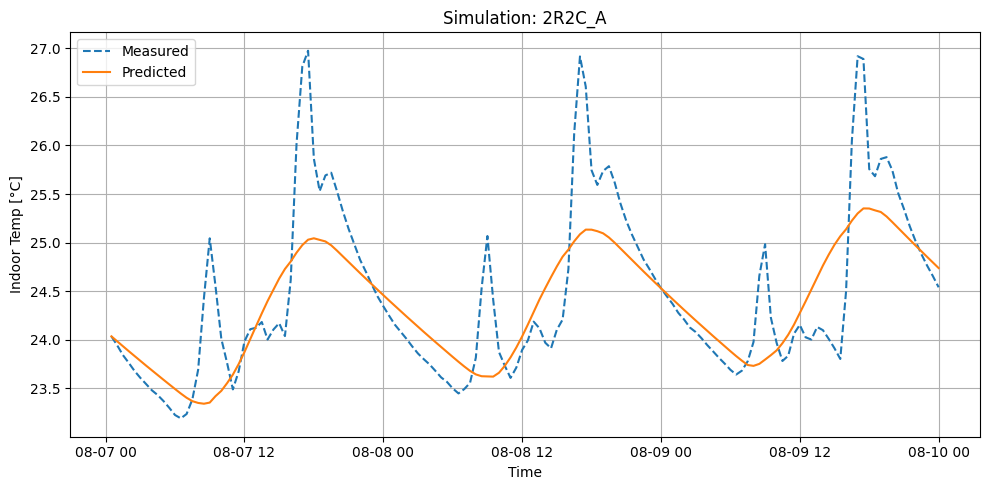


=== Best result ===
Best Trial Validation #: 1
Best Trial Training #: 13
Best RMSE Validation: 0.5938
RMSE Training of Best Validation : 0.2552
Best RMSE Training: 0.2222
Best initialization Validation: {'R_e_a': 0.1615206918862961, 'R_in_e': 0.18738045702725445, 'C_in': 143262489.1782297, 'C_e': 87513424.05208266, 'Ain': 15.33479199568724, 'Ae': 1.3729168170684198, 'fh': 0.5245113895702547}
Best initialization Training: {'R_e_a': 0.9398922914898616, 'R_in_e': 0.6280803450183464, 'C_in': 168117901.71388596, 'C_e': 70496764.25903024, 'Ain': 13.578036711332787, 'Ae': 10.60362405362165, 'fh': 0.5334610919763215}
Best parameters Validation: {'R_in_e': 0.0028802626821263205, 'R_e_a': 0.010472587605746488, 'C_in': 8785738.192954145, 'C_e': 130057520.88682137, 'Ain': 2.93203901481308, 'Ae': 2.6315121092495537, 'fh': 0.9999973148632961, 'Objective': 0.25520357986902875, 'Solve_time': 0.5268917083740234}
Best parameters Training: {'R_in_e': 0.0013584482220564524, 'R_e_a': 0.035476456049066164,

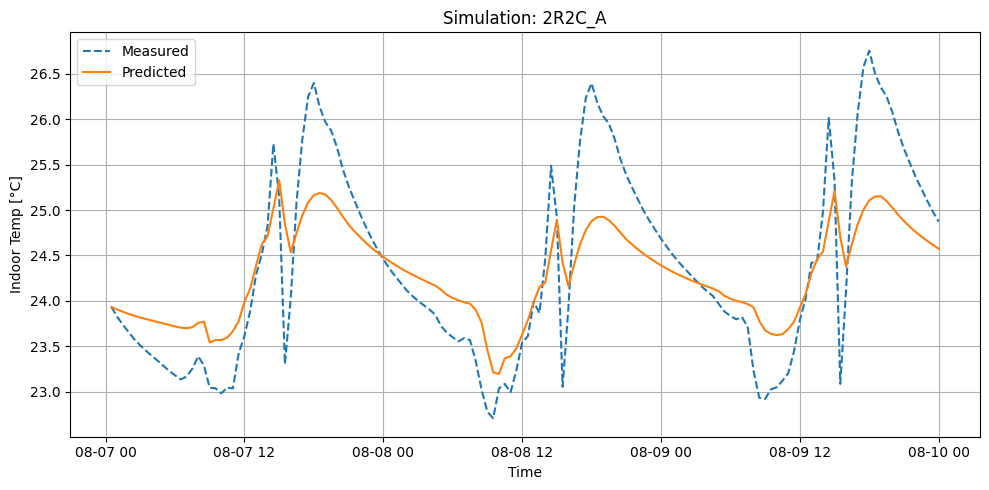

In [3]:
# --- Bounds ---
bounds_cs1 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.001, 0.3 * cs1_surface_area),
    "Ae": (0.001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}
bounds_cs2 = {
    "R_e_a": (0.0005, 1),
    "R_in_e": (0.0005, 1),
    "C_in": (1e6, 1e10),
    "C_e": (1e6, 1e10),
    "Ain": (0.001, 0.3 * cs2_surface_area),
    "Ae": (0.001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}
bounds_cs3 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (5e6, 5e8),
    "C_e": (5e6, 5e8),
    "Ain": (0.001, 0.3 * cs3_surface_area),
    "Ae": (0.001, 0.3 * cs3_surface_area),
    "fh": (0,1)
}
bounds_cs4 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.001, 0.3 * cs4_surface_area),
    "Ae": (0.001, 0.3 * cs4_surface_area),
    "fh": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_2r2c_cs1, parameters, best_initialization,validation_pred_2r2c_cs1, initialize_testing_2r2c_cs1, all_trials_2r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="2R2C_A", bounds=bounds_cs1, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_2r2c_cs1, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs1, show_plot=True
    )

###################### ======================== Case Study 2 ======================= ###########################

model_2r2c_cs2, parameters_2r2c_cs2, best_initialization_2r2c_cs2,validation_pred_2r2c_cs2, initialize_testing_2r2c_cs2, all_trials_2r2c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="2R2C_A", bounds=bounds_cs2, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_2r2c_cs2, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_2r2c_cs2, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs2, show_plot=True
    )

###################### ======================== Case Study 3 ======================= ###########################

model_2r2c_cs3, parameters_2r2c_cs3, best_initialization_2r2c_cs3,validation_pred_2r2c_cs3, initialize_testing_2r2c_cs3, all_trials_2r2c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="2R2C_A", bounds=bounds_cs3, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_2r2c_cs3, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_2r2c_cs3, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_2r2c_cs4, parameters_2r2c_cs4, best_initialization_2r2c_cs4,validation_pred_2r2c_cs4, initialize_testing_2r2c_cs4, all_trials_2r2c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="2R2C_A", bounds=bounds_cs4, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_2r2c_cs4, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_2r2c_cs4, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs4, show_plot=True
    )


=== Best result ===
Best Trial Validation #: 13
Best Trial Training #: 9
Best RMSE Validation: 0.1841
RMSE Training of Best Validation : 0.0109
Best RMSE Training: 0.0109
Best initialization Validation: {'R_in_e': 0.42200312604190543, 'R_e_a': 0.8927790393658979, 'R_in_a': 0.8176261181767025, 'C_in': 171566858.4972401, 'C_e': 130452293.28221495, 'Ain': 11.39083427577719, 'Ae': 17.70888924594998, 'fh': 0.26806364082287626}
Best initialization Training: {'R_in_e': 0.6443555436957767, 'R_e_a': 0.4093254369269983, 'R_in_a': 0.02636096930468452, 'C_in': 78920146.08572899, 'C_e': 358270142.19485134, 'Ain': 19.76775236491035, 'Ae': 0.8129770655052544, 'fh': 0.22197216193294944}
Best parameters Validation: {'R_in_e': 0.004993513129341981, 'R_e_a': 0.02385408743332739, 'R_in_a': 0.033648992191198435, 'C_in': 6631076.1916207345, 'C_e': 17802475.1768088, 'Ain': 1.3584055743684225, 'Ae': 0.8353656065713644, 'fh': 0.35935327377093623, 'Objective': 0.010863475750925522, 'Solve_time': 0.557527065277

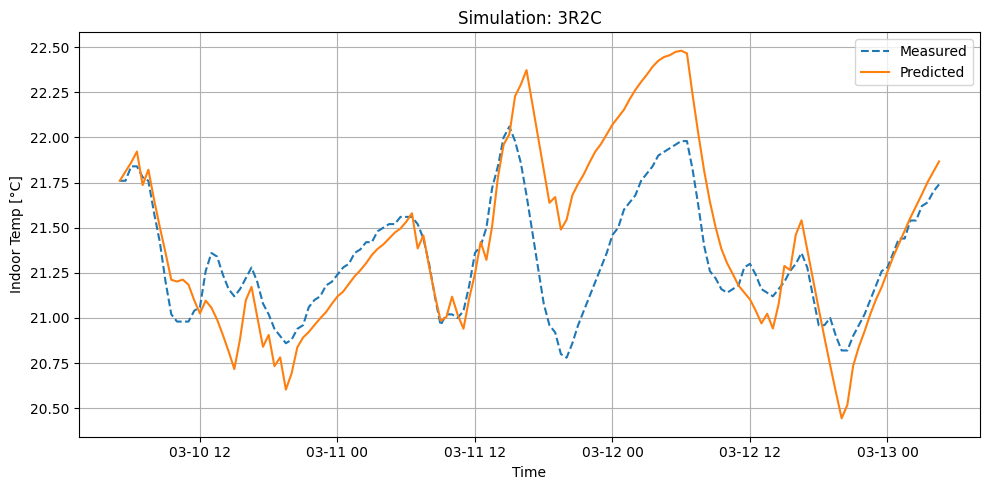


=== Best result ===
Best Trial Validation #: 4
Best Trial Training #: 10
Best RMSE Validation: 1.5183
RMSE Training of Best Validation : 0.2655
Best RMSE Training: 0.2655
Best initialization Validation: {'R_in_e': 0.27287299209273275, 'R_e_a': 0.590640436202218, 'R_in_a': 0.3616129230430868, 'C_in': 46699454.589990444, 'C_e': 458739474.15565914, 'Ain': 86.1958237970826, 'Ae': 598.6495378833702, 'fh': 0.44600577295795574}
Best initialization Training: {'R_in_e': 0.5399518010829619, 'R_e_a': 0.7909324416741246, 'R_in_a': 0.31943375042913785, 'C_in': 313319796.84206754, 'C_e': 443102896.3698574, 'Ain': 387.99384696853303, 'Ae': 146.7645457988418, 'fh': 0.02440078155653802}
Best parameters Validation: {'R_in_e': 0.015296275117928766, 'R_e_a': 0.9996474480401566, 'R_in_a': 0.0014739107401214003, 'C_in': 499999757.2018158, 'C_e': 499999908.15657103, 'Ain': 136.1150052424404, 'Ae': 0.0004159273121221023, 'fh': 0.31703041779667535, 'Objective': 0.2655056636291797, 'Solve_time': 0.196401119232

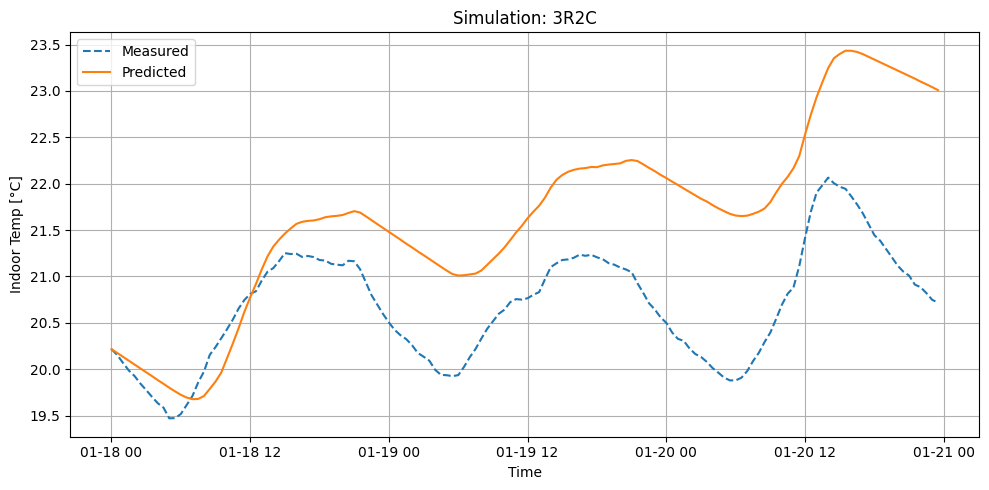


=== Best result ===
Best Trial Validation #: 17
Best Trial Training #: 1
Best RMSE Validation: 0.8702
RMSE Training of Best Validation : 0.4052
Best RMSE Training: 0.3853
Best initialization Validation: {'R_in_e': 0.20132420197363637, 'R_e_a': 0.49210295219469546, 'R_in_a': 0.06514472813805895, 'C_in': 291403729.555285, 'C_e': 135227708.81311375, 'Ain': 13.638280864985852, 'Ae': 5.307258461397218, 'fh': 0.4552201490818012}
Best initialization Training: {'R_in_e': 0.37331582849530165, 'R_e_a': 0.2604940299765659, 'R_in_a': 0.7236966935748964, 'C_in': 248441991.80430663, 'C_e': 41442061.73791632, 'Ain': 3.7652107350215784, 'Ae': 11.683756532702724, 'fh': 0.07613085949030018}
Best parameters Validation: {'R_in_e': 0.006218584773331625, 'R_e_a': 0.015281172470797744, 'R_in_a': 0.03841580298418156, 'C_in': 1000003.6726920058, 'C_e': 104237082.81299433, 'Ain': 0.7522680628615261, 'Ae': 5.365708224496583, 'fh': 0.3650718106262293, 'Objective': 0.4051837052619613, 'Solve_time': 7.444798231124

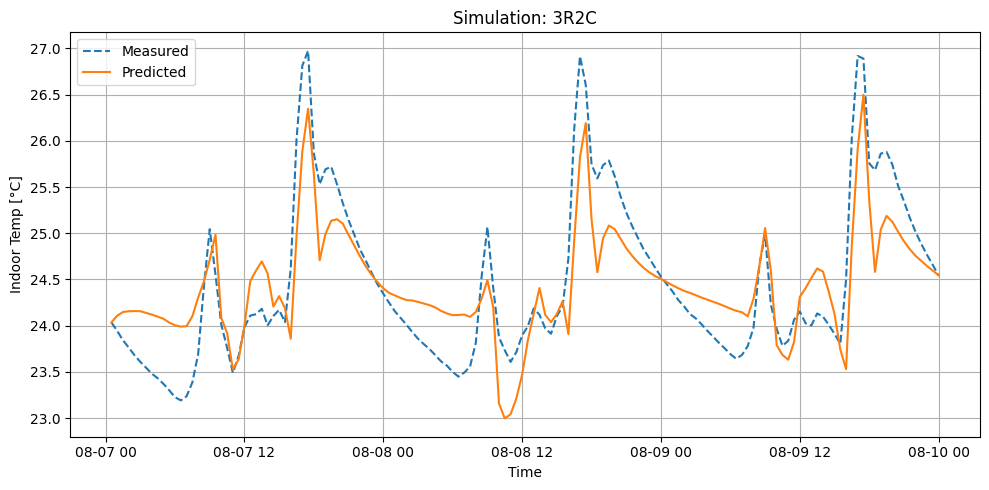


=== Best result ===
Best Trial Validation #: 6
Best Trial Training #: 10
Best RMSE Validation: 0.5046
RMSE Training of Best Validation : 0.3381
Best RMSE Training: 0.2221
Best initialization Validation: {'R_in_e': 0.6590490677253752, 'R_e_a': 0.49869752073668583, 'R_in_a': 0.5558081873866936, 'C_in': 359881687.3578597, 'C_e': 114998915.92431806, 'Ain': 17.03731033117868, 'Ae': 16.668965593393775, 'fh': 0.6503256863469369}
Best initialization Training: {'R_in_e': 0.9124509822710742, 'R_e_a': 0.2114515268166609, 'R_in_a': 0.6233436169799192, 'C_in': 316148549.82616776, 'C_e': 366823398.1852252, 'Ain': 2.24989425890763, 'Ae': 12.240635313567244, 'fh': 0.909032520665641}
Best parameters Validation: {'R_in_e': 0.0009999901128141125, 'R_e_a': 0.9998350813701055, 'R_in_a': 0.004121096884164562, 'C_in': 28218911.732366886, 'C_e': 499999489.1565206, 'Ain': 3.4366467569034485, 'Ae': 7.437357782460077, 'fh': 0.9999999806016411, 'Objective': 0.3380523892308752, 'Solve_time': 16.868340969085693}
B

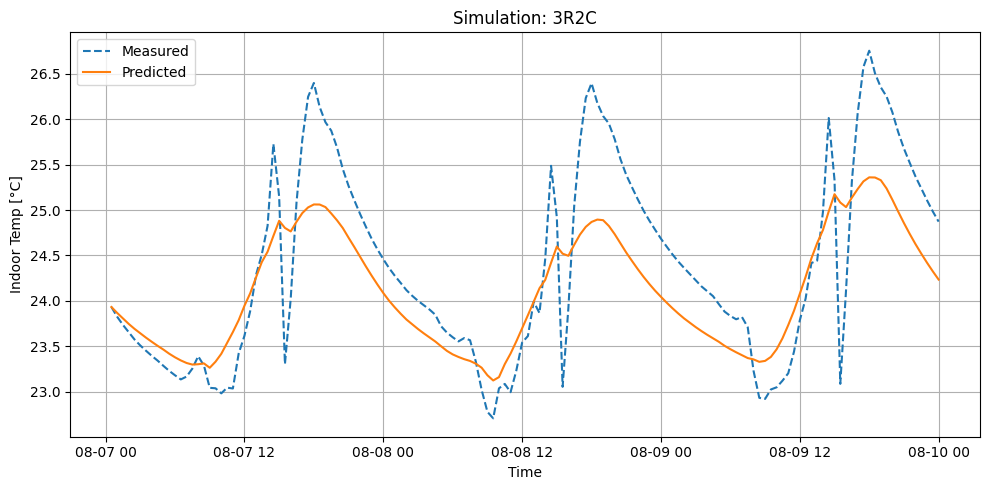

In [4]:
# --- Bounds ---
bounds_cs1 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}
bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}
bounds_cs3 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs3_surface_area),
    "Ae": (0.0001, 0.3 * cs3_surface_area),
    "fh": (0,1)
}
bounds_cs4 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs4_surface_area),
    "Ae": (0.0001, 0.3 * cs4_surface_area),
    "fh": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_3r2c_cs1, parameters_3r2c_cs1, best_initialization_3r2c_cs1, validation_pred_3r2c_cs1, initialize_testing_3r2c_cs1, all_trials_3r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="3R2C", bounds=bounds_cs1, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_3r2c_cs1, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_3r2c_cs1, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs1, show_plot=True
    )

###################### ======================== Case Study 2 ======================= ###########################

model_3r2c_cs2, parameters_3r2c_cs2, best_initialization_3r2c_cs2, validation_pred_3r2c_cs2, initialize_testing_3r2c_cs2, all_trials_3r2c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="3R2C", bounds=bounds_cs2, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_3r2c_cs2, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_3r2c_cs2, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs2, show_plot=True
    )

###################### ======================== Case Study 3 ======================= ###########################

model_3r2c_cs3, parameters_3r2c_cs3, best_initialization_3r2c_cs3, validation_pred_3r2c_cs3, initialize_testing_3r2c_cs3, all_trials_3r2c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="3R2C", bounds=bounds_cs3, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_3r2c_cs3, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_3r2c_cs3, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_3r2c_cs4, parameters_3r2c_cs4, best_initialization_3r2c_cs4, validation_pred_3r2c_cs4, initialize_testing_3r2c_cs4, all_trials_3r2c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="3R2C", bounds=bounds_cs4, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_3r2c_cs4, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_3r2c_cs4, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs4, show_plot=True
    )


=== Best result ===
Best Trial Validation #: 20
Best Trial Training #: 4
Best RMSE Validation: 0.1953
RMSE Training of Best Validation : 0.0108
Best RMSE Training: 0.0099
Best initialization Validation: {'R_int_in': 0.9658905168309135, 'R_in_e': 0.4336328825734717, 'R_e_a': 0.31319250081908906, 'R_in_a': 0.5071295791145636, 'C_int': 220428430.29009557, 'C_in': 53905544.50975786, 'C_e': 320844165.7674749, 'Aint': 6.481223871469737, 'Ain': 18.587676688139396, 'Ae': 19.50606775183536, 'fh_int': 0.1520248531286481, 'fh_in': 0.06134962711066816, 'fh_e': 0.7807615860684398}
Best initialization Training: {'R_int_in': 0.22881508800862518, 'R_in_e': 0.07504953192090676, 'R_e_a': 0.6042416961946151, 'R_in_a': 0.6688763729579063, 'C_int': 310201784.58959574, 'C_in': 232390829.0477255, 'C_e': 190637147.15339983, 'Aint': 25.9000231537898, 'Ain': 15.572501645908028, 'Ae': 14.375508410704166, 'fh_int': 0.025642065806435688, 'fh_in': 0.34124782762615635, 'fh_e': 0.38019561878585706}
Best parameters V

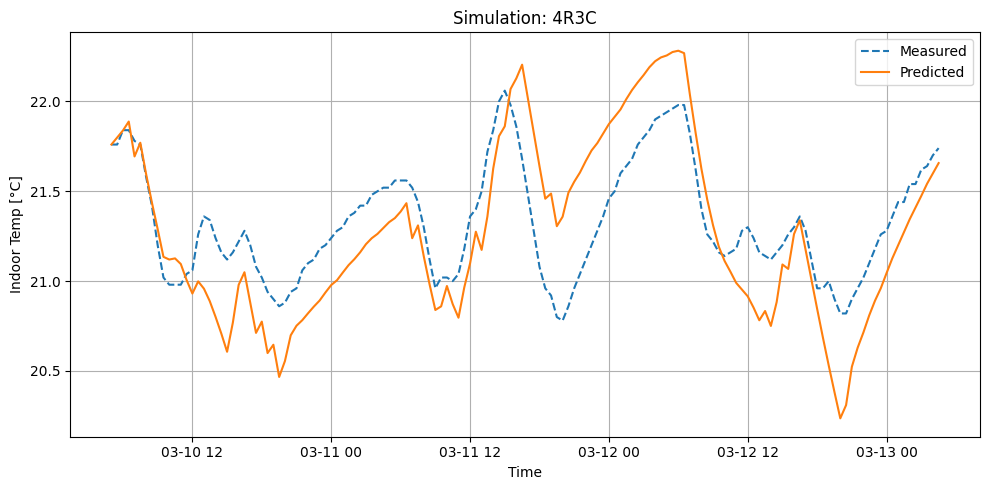


=== Best result ===
Best Trial Validation #: 3
Best Trial Training #: 1
Best RMSE Validation: 0.4793
RMSE Training of Best Validation : 0.1972
Best RMSE Training: 0.0719
Best initialization Validation: {'R_int_in': 0.7265279501653249, 'R_in_e': 0.8181497591972312, 'R_e_a': 0.21508434357805056, 'R_in_a': 0.5068409875659253, 'C_int': 420542670.37198657, 'C_in': 366721410.5294058, 'C_e': 271667918.09933394, 'Aint': 371.91908595425787, 'Ain': 320.2671937212017, 'Ae': 187.45559457601183, 'fh_int': 0.5650219928590161, 'fh_in': 0.6888853020500907, 'fh_e': 0.8733229158608077}
Best initialization Training: {'R_int_in': 0.6137137033295365, 'R_in_e': 0.9431896860692182, 'R_e_a': 0.24221132640883994, 'R_in_a': 0.12325837354831623, 'C_int': 99698280.34213673, 'C_in': 443598140.22438365, 'C_e': 323330433.35241675, 'Aint': 180.12134862999196, 'Ain': 514.046589955535, 'Ae': 542.663111571965, 'fh_int': 0.846514338690278, 'fh_in': 0.9189265336395545, 'fh_e': 0.2522410201733616}
Best parameters Validati

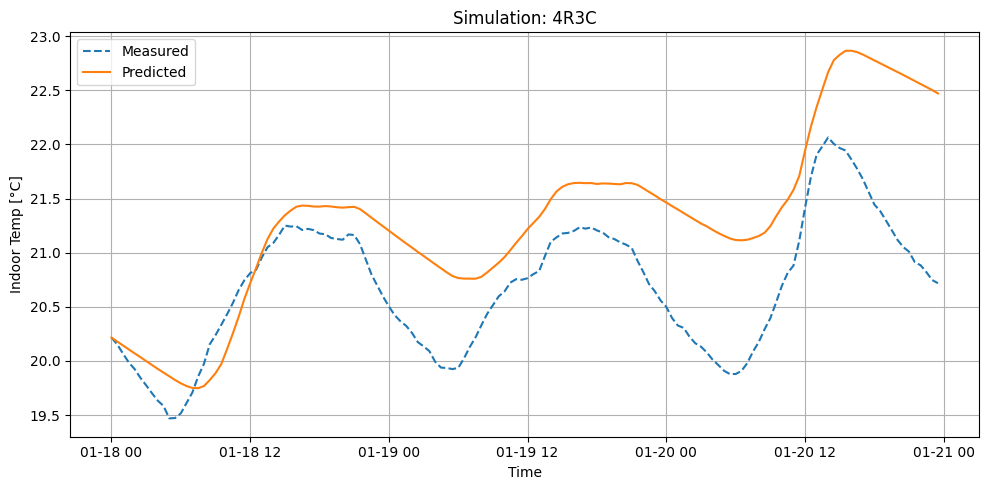


=== Best result ===
Best Trial Validation #: 29
Best Trial Training #: 10
Best RMSE Validation: 0.8148
RMSE Training of Best Validation : 0.4076
Best RMSE Training: 0.3415
Best initialization Validation: {'R_int_in': 0.49770203197231067, 'R_in_e': 0.28570554474166165, 'R_e_a': 0.13556070627369377, 'R_in_a': 0.6302985814979531, 'C_int': 28300818.969664432, 'C_in': 374624242.78214854, 'C_e': 159612293.476245, 'Aint': 0.0024032369073985244, 'Ain': 8.740357168042705, 'Ae': 0.8012629506311606, 'fh_int': 0.27616955782089947, 'fh_in': 0.7069764874557162, 'fh_e': 0.06268962162186587}
Best initialization Training: {'R_int_in': 0.6368238543167232, 'R_in_e': 0.9134603736810842, 'R_e_a': 0.6133483214081296, 'R_in_a': 0.8739511962794123, 'C_int': 362317760.0664876, 'C_in': 61334538.1021607, 'C_e': 451343709.6741778, 'Aint': 1.1362830940993147, 'Ain': 9.130890383819505, 'Ae': 2.4306306031557465, 'fh_int': 0.011706610730904066, 'fh_in': 0.422034260127639, 'fh_e': 0.29504070765415624}
Best parameters

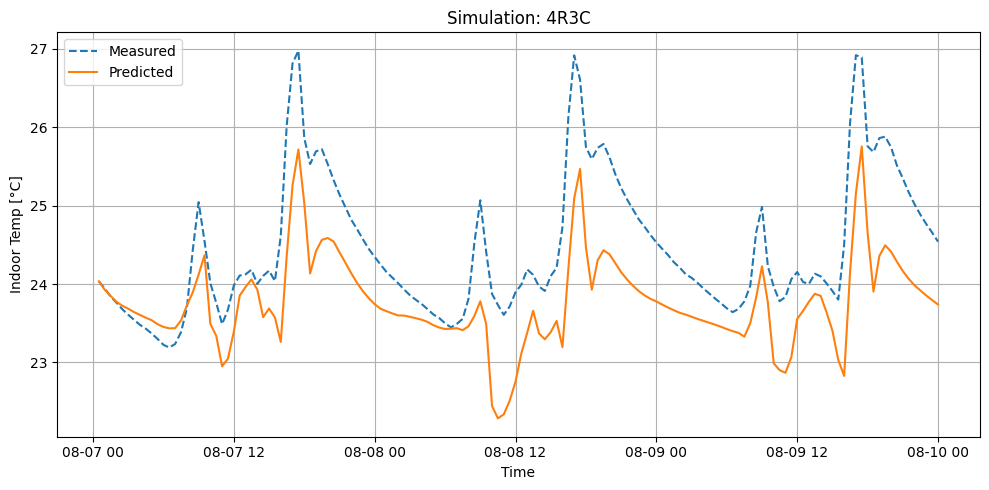


=== Best result ===
Best Trial Validation #: 23
Best Trial Training #: 3
Best RMSE Validation: 0.5265
RMSE Training of Best Validation : 0.3620
Best RMSE Training: 0.1974
Best initialization Validation: {'R_int_in': 0.3053346272305173, 'R_in_e': 0.23195582879311522, 'R_e_a': 0.003470874442138793, 'R_in_a': 0.7298861044998204, 'C_int': 483462535.29988354, 'C_in': 113077589.46258047, 'C_e': 331927939.2715471, 'Aint': 12.68645300136133, 'Ain': 14.508089139910062, 'Ae': 7.227017006013013, 'fh_int': 0.30293090564042924, 'fh_in': 0.3252951340230311, 'fh_e': 0.7126213330985128}
Best initialization Training: {'R_int_in': 0.4587842059489754, 'R_in_e': 0.2104649585571534, 'R_e_a': 0.36996975652306563, 'R_in_a': 0.3710736294752023, 'C_int': 27314684.069511235, 'C_in': 384062733.10473764, 'C_e': 208952410.63365483, 'Aint': 14.059293846572155, 'Ain': 14.540965784350098, 'Ae': 3.6251771359415828, 'fh_int': 0.6573534821701286, 'fh_in': 0.4722818041629817, 'fh_e': 0.8801567379214851}
Best parameters 

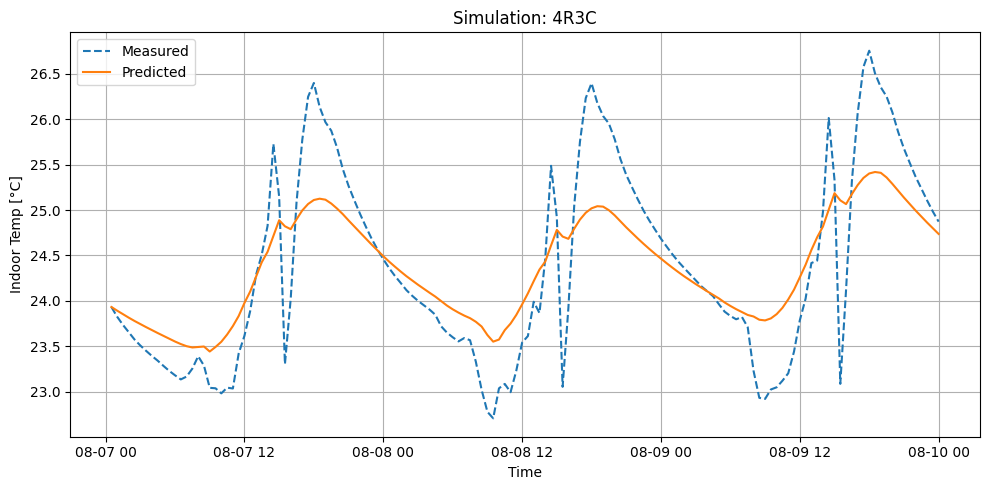

In [5]:
# --- Bounds ---
bounds_cs1 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs1_surface_area),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}
bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}
bounds_cs3 = {
   "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs3_surface_area),
    "Ain": (0.0001, 0.3 * cs3_surface_area),
    "Ae": (0.0001, 0.3 * cs3_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}
bounds_cs4 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs4_surface_area),
    "Ain": (0.0001, 0.3 * cs4_surface_area),
    "Ae": (0.0001, 0.3 * cs4_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_4r3c_cs1, parameters_4r3c_cs1, best_initialization_4r3c_cs1, validation_pred_4r3c_cs1, initialize_testing_4r3c_cs1, all_trials_4r3c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="4R3C", bounds=bounds_cs1, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_4r3c_cs1, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_4r3c_cs1, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs1, show_plot=True
    )

###################### ======================== Case Study 2 ======================= ###########################

model_4r3c_cs2, parameters_4r3c_cs2, best_initialization_4r3c_cs2, validation_pred_4r3c_cs2, initialize_testing_4r3c_cs2, all_trials_4r3c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="4R3C", bounds=bounds_cs2, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_4r3c_cs2, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_4r3c_cs2, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs2, show_plot=True
    )

###################### ======================== Case Study 3 ======================= ###########################

model_4r3c_cs3, parameters_4r3c_cs3, best_initialization_4r3c_cs3, validation_pred_4r3c_cs3, initialize_testing_4r3c_cs3, all_trials_4r3c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="4R3C", bounds=bounds_cs3, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_4r3c_cs3, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_4r3c_cs3, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_4r3c_cs4, parameters_4r3c_cs4, best_initialization_4r3c_cs4, validation_pred_4r3c_cs4, initialize_testing_4r3c_cs4, all_trials_4r3c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="4R3C", bounds=bounds_cs4, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
validation, t_pred_4r3c_cs4, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_4r3c_cs4, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs4, show_plot=True
    )


RMSE 1R1C Case Study 1: 0.15 °C
RMSE 2R2C Case Study 1: 0.14 °C
RMSE 3R2C Case Study 1: 0.10 °C
RMSE 4R3C Case Study 1: 0.10 °C
RMSE 1R1C Case Study 2: 0.87 °C
RMSE 2R2C Case Study 2: 0.89 °C
RMSE 3R2C Case Study 2: 0.52 °C
RMSE 4R3C Case Study 2: 0.44 °C
RMSE 1R1C Case Study 3: 1.16 °C
RMSE 2R2C Case Study 3: 1.12 °C
RMSE 3R2C Case Study 3: 0.64 °C
RMSE 4R3C Case Study 3: 0.64 °C
RMSE 1R1C Case Study 4: 0.79 °C
RMSE 2R2C Case Study 4: 0.51 °C
RMSE 3R2C Case Study 4: 0.58 °C
RMSE 4R3C Case Study 4: 0.60 °C


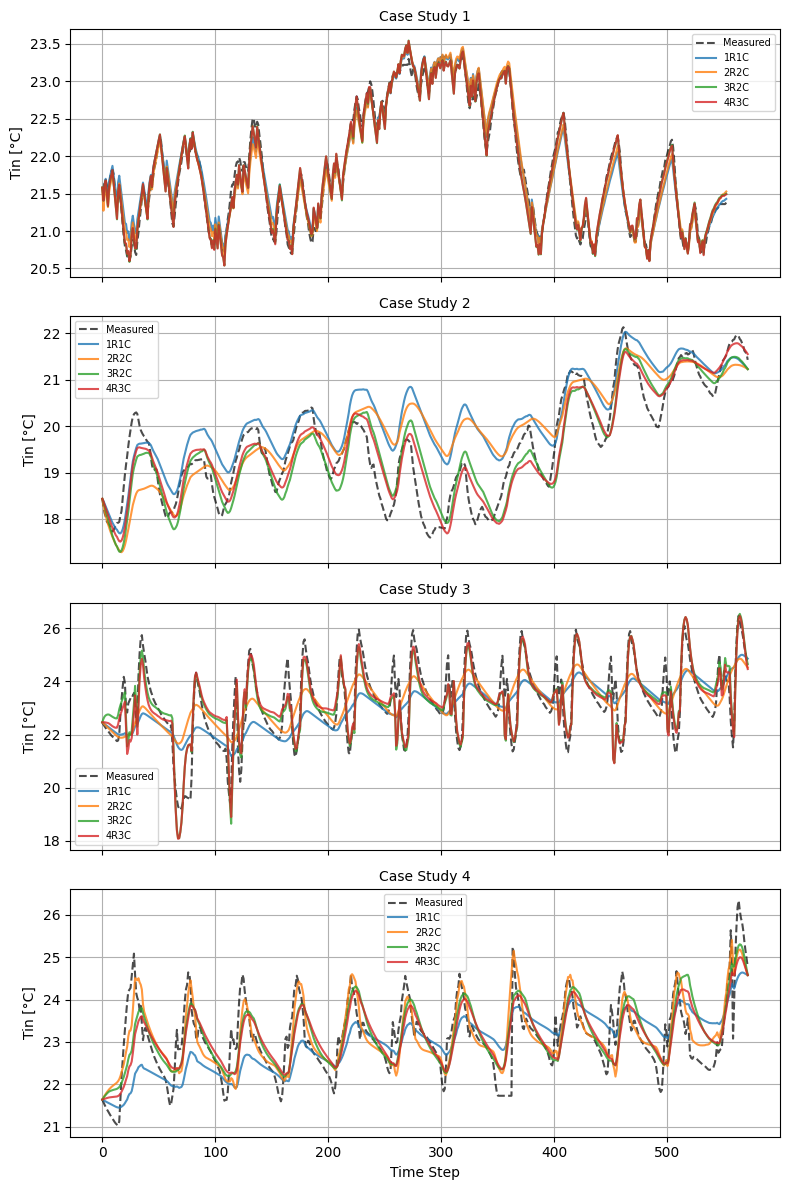

In [6]:
T_model_1r1c_cs1 = np.array([model_1r1c_cs1.T_in[t]() for t in model_1r1c_cs1.T_in.index_set()])
T_model_2r2c_cs1 = np.array([model_2r2c_cs1.T_in[t]() for t in model_2r2c_cs1.T_in.index_set()])
T_model_3r2c_cs1 = np.array([model_3r2c_cs1.T_in[t]() for t in model_3r2c_cs1.T_in.index_set()])
T_model_4r3c_cs1 = np.array([model_4r3c_cs1.T_in[t]() for t in model_4r3c_cs1.T_in.index_set()])

T_model_1r1c_cs2 = np.array([model_1r1c_cs2.T_in[t]() for t in model_1r1c_cs2.T_in.index_set()])
T_model_2r2c_cs2 = np.array([model_2r2c_cs2.T_in[t]() for t in model_2r2c_cs2.T_in.index_set()])
T_model_3r2c_cs2 = np.array([model_3r2c_cs2.T_in[t]() for t in model_3r2c_cs2.T_in.index_set()])
T_model_4r3c_cs2 = np.array([model_4r3c_cs2.T_in[t]() for t in model_4r3c_cs2.T_in.index_set()])

T_model_1r1c_cs3 = np.array([model_1r1c_cs3.T_in[t]() for t in model_1r1c_cs3.T_in.index_set()])
T_model_2r2c_cs3 = np.array([model_2r2c_cs3.T_in[t]() for t in model_2r2c_cs3.T_in.index_set()])
T_model_3r2c_cs3 = np.array([model_3r2c_cs3.T_in[t]() for t in model_3r2c_cs3.T_in.index_set()])
T_model_4r3c_cs3 = np.array([model_4r3c_cs3.T_in[t]() for t in model_4r3c_cs3.T_in.index_set()])

T_model_1r1c_cs4 = np.array([model_1r1c_cs4.T_in[t]() for t in model_1r1c_cs4.T_in.index_set()])
T_model_2r2c_cs4 = np.array([model_2r2c_cs4.T_in[t]() for t in model_2r2c_cs4.T_in.index_set()])
T_model_3r2c_cs4 = np.array([model_3r2c_cs4.T_in[t]() for t in model_3r2c_cs4.T_in.index_set()])
T_model_4r3c_cs4 = np.array([model_4r3c_cs4.T_in[t]() for t in model_4r3c_cs4.T_in.index_set()])


datasets=[train_cs1, train_cs2, train_cs3, train_cs4]
validation_dataset=[[T_model_1r1c_cs1,T_model_2r2c_cs1,T_model_3r2c_cs1, T_model_4r3c_cs1] ,
                    [T_model_1r1c_cs2,T_model_2r2c_cs2,T_model_3r2c_cs2, T_model_4r3c_cs2] , 
                    [T_model_1r1c_cs3,T_model_2r2c_cs3,T_model_3r2c_cs3, T_model_4r3c_cs3] , 
                    [T_model_1r1c_cs4,T_model_2r2c_cs4,T_model_3r2c_cs4, T_model_4r3c_cs4]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
TC_labels = ['Case Study 1', 'Case Study 2', 'Case Study 3', 'Case Study 4']
plot_model_validation(datasets,validation_dataset,labels,TC_labels, figsize=(8,12))

RMSE 1R1C Case Study 1: 0.28 °C
RMSE 2R2C Case Study 1: 0.22 °C
RMSE 3R2C Case Study 1: 0.18 °C
RMSE 4R3C Case Study 1: 0.20 °C
RMSE 1R1C Case Study 2: 1.34 °C
RMSE 2R2C Case Study 2: 1.37 °C
RMSE 3R2C Case Study 2: 1.52 °C
RMSE 4R3C Case Study 2: 0.48 °C
RMSE 1R1C Case Study 3: 1.06 °C
RMSE 2R2C Case Study 3: 0.92 °C
RMSE 3R2C Case Study 3: 0.87 °C
RMSE 4R3C Case Study 3: 0.81 °C
RMSE 1R1C Case Study 4: 1.34 °C
RMSE 2R2C Case Study 4: 0.59 °C
RMSE 3R2C Case Study 4: 0.50 °C
RMSE 4R3C Case Study 4: 0.53 °C


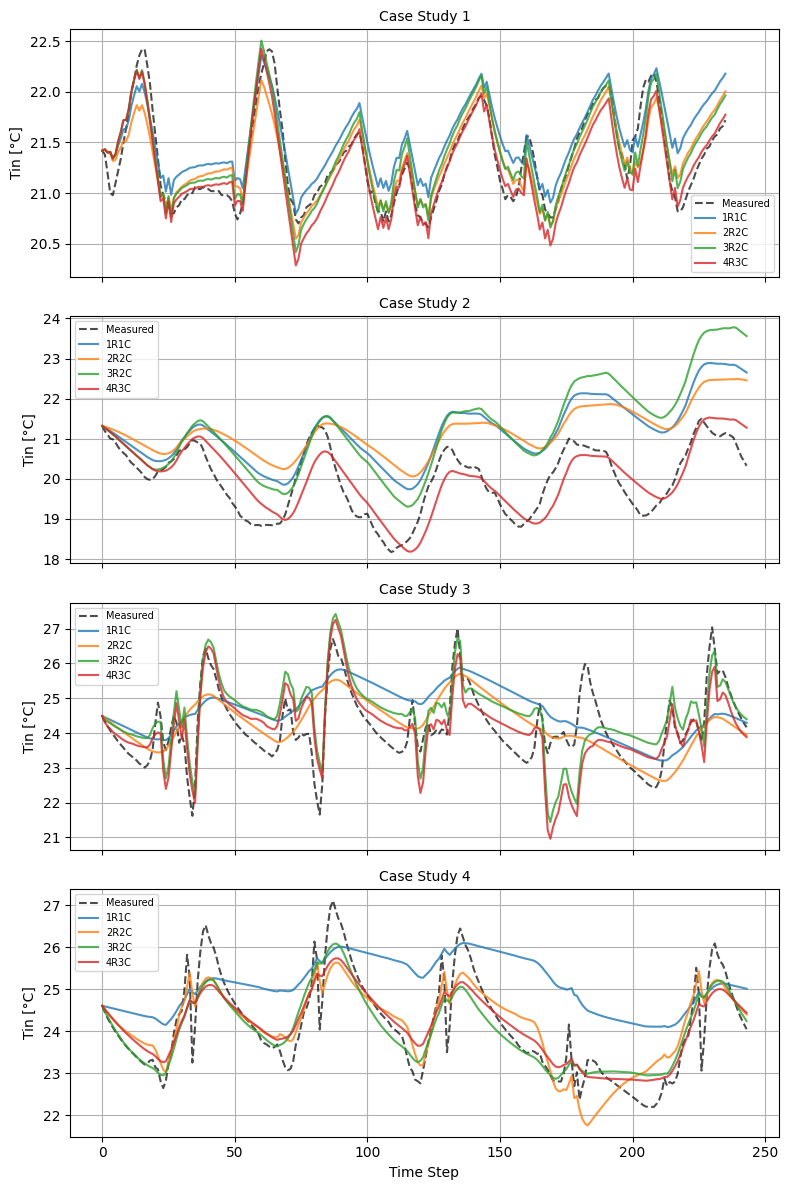

In [7]:
T_model_1r1c_cs1 = np.array(validation_pred_1r1c_cs1['T_in_estimate'])
T_model_2r2c_cs1 = np.array(validation_pred_2r2c_cs1['T_in_estimate'])
T_model_3r2c_cs1 = np.array(validation_pred_3r2c_cs1['T_in_estimate'])
T_model_4r3c_cs1 = np.array(validation_pred_4r3c_cs1['T_in_estimate'])

T_model_1r1c_cs2 = np.array(validation_pred_1r1c_cs2['T_in_estimate'])
T_model_2r2c_cs2 = np.array(validation_pred_2r2c_cs2['T_in_estimate'])
T_model_3r2c_cs2 = np.array(validation_pred_3r2c_cs2['T_in_estimate'])
T_model_4r3c_cs2 = np.array(validation_pred_4r3c_cs2['T_in_estimate'])

T_model_1r1c_cs3 = np.array(validation_pred_1r1c_cs3['T_in_estimate'])
T_model_2r2c_cs3 = np.array(validation_pred_2r2c_cs3['T_in_estimate'])
T_model_3r2c_cs3 = np.array(validation_pred_3r2c_cs3['T_in_estimate'])
T_model_4r3c_cs3 = np.array(validation_pred_4r3c_cs3['T_in_estimate'])

T_model_1r1c_cs4 = np.array(validation_pred_1r1c_cs4['T_in_estimate'])
T_model_2r2c_cs4 = np.array(validation_pred_2r2c_cs4['T_in_estimate'])
T_model_3r2c_cs4 = np.array(validation_pred_3r2c_cs4['T_in_estimate'])
T_model_4r3c_cs4 = np.array(validation_pred_4r3c_cs4['T_in_estimate'])
datasets=[val_cs1, val_cs2, val_cs3, val_cs4]
validation_dataset=[[T_model_1r1c_cs1,T_model_2r2c_cs1,T_model_3r2c_cs1, T_model_4r3c_cs1] ,
                    [T_model_1r1c_cs2,T_model_2r2c_cs2,T_model_3r2c_cs2, T_model_4r3c_cs2] , 
                    [T_model_1r1c_cs3,T_model_2r2c_cs3,T_model_3r2c_cs3, T_model_4r3c_cs3] , 
                    [T_model_1r1c_cs4,T_model_2r2c_cs4,T_model_3r2c_cs4, T_model_4r3c_cs4]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
TC_labels = ['Case Study 1', 'Case Study 2', 'Case Study 3', 'Case Study 4']
plot_model_validation(datasets,validation_dataset,labels, TC_labels, figsize=(8,12))

RMSE 1R1C Case Study 1: 0.36 °C
RMSE 2R2C Case Study 1: 0.32 °C
RMSE 3R2C Case Study 1: 0.33 °C
RMSE 4R3C Case Study 1: 0.31 °C
RMSE 1R1C Case Study 2: 0.34 °C
RMSE 2R2C Case Study 2: 0.41 °C
RMSE 3R2C Case Study 2: 1.17 °C
RMSE 4R3C Case Study 2: 0.78 °C
RMSE 1R1C Case Study 3: 0.67 °C
RMSE 2R2C Case Study 3: 0.58 °C
RMSE 3R2C Case Study 3: 0.49 °C
RMSE 4R3C Case Study 3: 0.86 °C
RMSE 1R1C Case Study 4: 0.82 °C
RMSE 2R2C Case Study 4: 0.64 °C
RMSE 3R2C Case Study 4: 0.65 °C
RMSE 4R3C Case Study 4: 0.61 °C


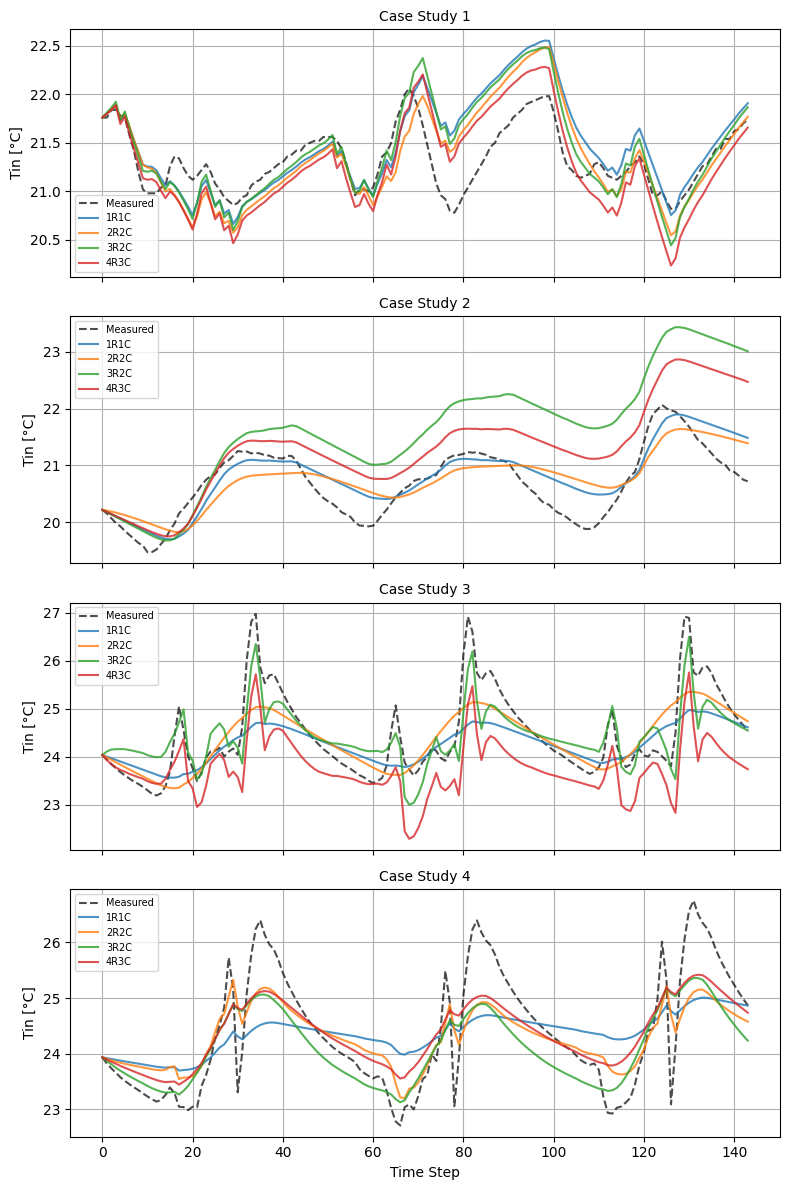

In [8]:
datasets=[test_cs1,test_cs2,test_cs3, test_cs4]
validation_dataset=[[t_pred_1r1c_cs1,t_pred_2r2c_cs1,t_pred_3r2c_cs1, t_pred_4r3c_cs1],
                    [t_pred_1r1c_cs2,t_pred_2r2c_cs2,t_pred_3r2c_cs2, t_pred_4r3c_cs2],
                    [t_pred_1r1c_cs3,t_pred_2r2c_cs3,t_pred_3r2c_cs3, t_pred_4r3c_cs3],
                    [t_pred_1r1c_cs4,t_pred_2r2c_cs4,t_pred_3r2c_cs4, t_pred_4r3c_cs4]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
TC_labels = ['Case Study 1', 'Case Study 2', 'Case Study 3', 'Case Study 4']

plot_model_validation(datasets,validation_dataset,labels, TC_labels, figsize=(8,12))

## Computantional Time ##

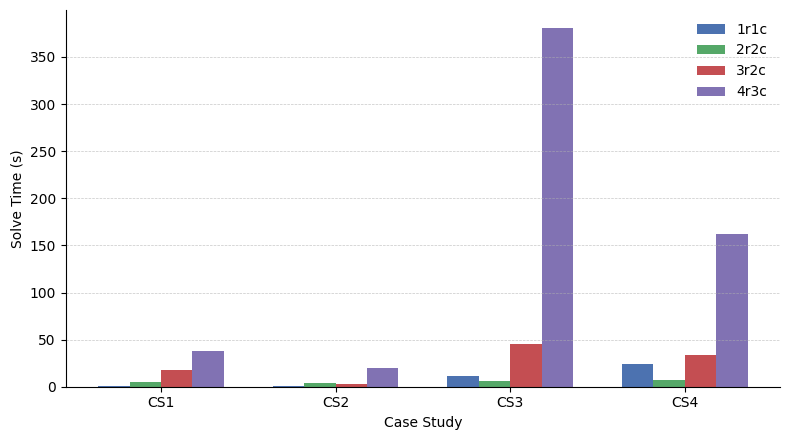

In [10]:
cases = ['CS1','CS2', 'CS3', 'CS4']
models = ['1r1c', '2r2c', '3r2c', '4r3c']
solve_times = {
    '1r1c': [
        all_trials_1r1c_cs1['Solve_time'].sum(),
        all_trials_1r1c_cs2['Solve_time'].sum(),
        all_trials_1r1c_cs3['Solve_time'].sum(),
        all_trials_1r1c_cs4['Solve_time'].sum()
    ],
    '2r2c': [
        all_trials_2r2c_cs1['Solve_time'].sum(),
        all_trials_2r2c_cs2['Solve_time'].sum(),
        all_trials_2r2c_cs3['Solve_time'].sum(),
        all_trials_2r2c_cs4['Solve_time'].sum()
    ],
    '3r2c': [
        all_trials_3r2c_cs1['Solve_time'].sum(),
        all_trials_3r2c_cs2['Solve_time'].sum(),
        all_trials_3r2c_cs3['Solve_time'].sum(),
        all_trials_3r2c_cs4['Solve_time'].sum()
    ],
    '4r3c': [
        all_trials_4r3c_cs1['Solve_time'].sum(),
        all_trials_4r3c_cs2['Solve_time'].sum(),
        all_trials_4r3c_cs3['Solve_time'].sum(),
        all_trials_4r3c_cs4['Solve_time'].sum()
    ],
}

x = np.arange(len(cases))
width = 0.18
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3']

fig, ax = plt.subplots(figsize=(8, 4.5))

for i, model in enumerate(models):
    ax.bar(x + i * width, solve_times[model], width, label=model, color=colors[i])

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(cases)
ax.set_ylabel("Solve Time (s)")
ax.set_xlabel("Case Study")
ax.legend(frameon=False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

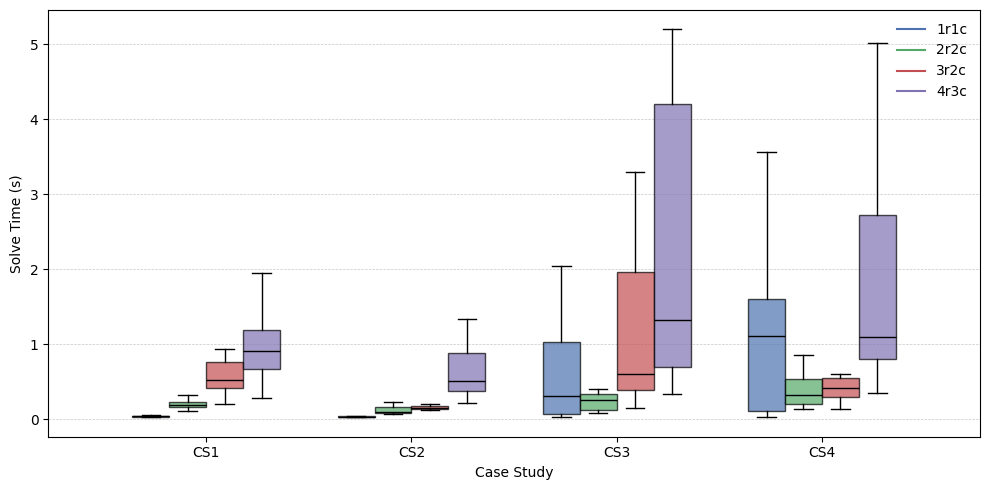

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

positions = []
data = []
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3']
width = 0.18

# Prepare data and positions
for i, case in enumerate(cases):
    for j, model in enumerate(models):
        positions.append(i + j * width)
        # Use all_trials_XrXc_csY['Solve_time'] for each box
        if model == '1r1c':
            data.append(all_trials_1r1c_cs1['Solve_time'].values if i == 0 else
                        all_trials_1r1c_cs2['Solve_time'].values if i == 1 else
                        all_trials_1r1c_cs3['Solve_time'].values if i == 2 else
                        all_trials_1r1c_cs4['Solve_time'].values)
        elif model == '2r2c':
            data.append(all_trials_2r2c_cs1['Solve_time'].values if i == 0 else
                        all_trials_2r2c_cs2['Solve_time'].values if i == 1 else
                        all_trials_2r2c_cs3['Solve_time'].values if i == 2 else
                        all_trials_2r2c_cs4['Solve_time'].values)
        elif model == '3r2c':
            data.append(all_trials_3r2c_cs1['Solve_time'].values if i == 0 else
                        all_trials_3r2c_cs2['Solve_time'].values if i == 1 else
                        all_trials_3r2c_cs3['Solve_time'].values if i == 2 else
                        all_trials_3r2c_cs4['Solve_time'].values)
        elif model == '4r3c':
            data.append(all_trials_4r3c_cs1['Solve_time'].values if i == 0 else
                        all_trials_4r3c_cs2['Solve_time'].values if i == 1 else
                        all_trials_4r3c_cs3['Solve_time'].values if i == 2 else
                        all_trials_4r3c_cs4['Solve_time'].values)

# Plot each boxplot with its color
for j, model in enumerate(models):
    idx = [i * len(models) + j for i in range(len(cases))]
    bp = ax.boxplot([data[k] for k in idx],
                    positions=[positions[k] for k in idx],
                    widths=width,
                    patch_artist=True,
                    showfliers=False,
                    boxprops=dict(facecolor=colors[j], alpha=0.7),
                    medianprops=dict(color='black'))

# Set x-ticks at the center of each case group
group_centers = [i + 1.5 * width for i in range(len(cases))]
ax.set_xticks(group_centers)
ax.set_xticklabels(cases)

ax.set_ylabel("Solve Time (s)")
ax.set_xlabel("Case Study")
# ax.set_title("Solve Time Distribution by Case Study and Model Type")

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')

# Legend
for j, model in enumerate(models):
    ax.plot([], [], color=colors[j], label=model)
ax.legend(frameon=False)

plt.tight_layout()
plt.show()
